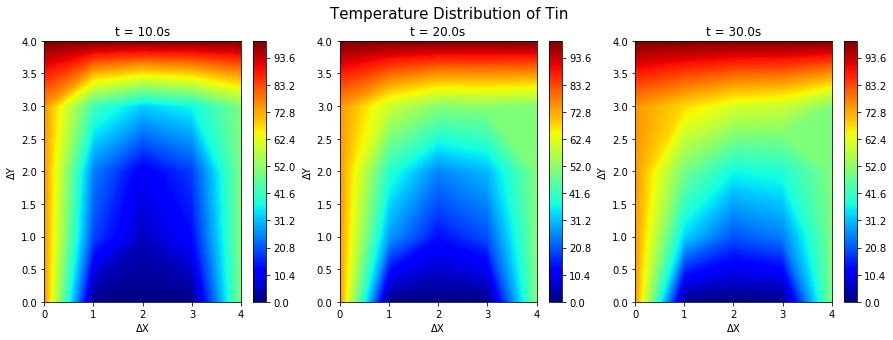

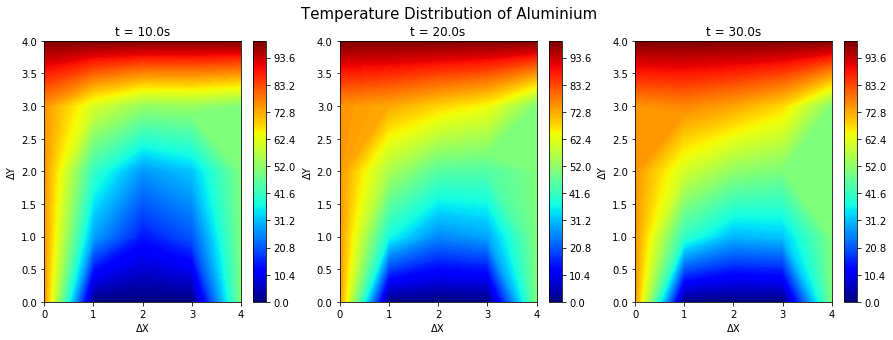

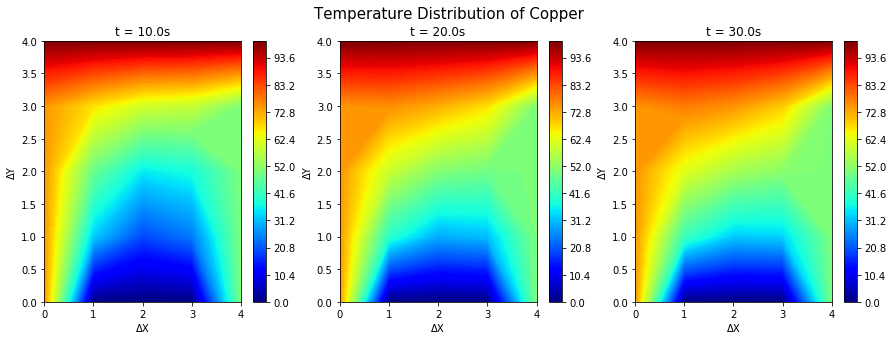

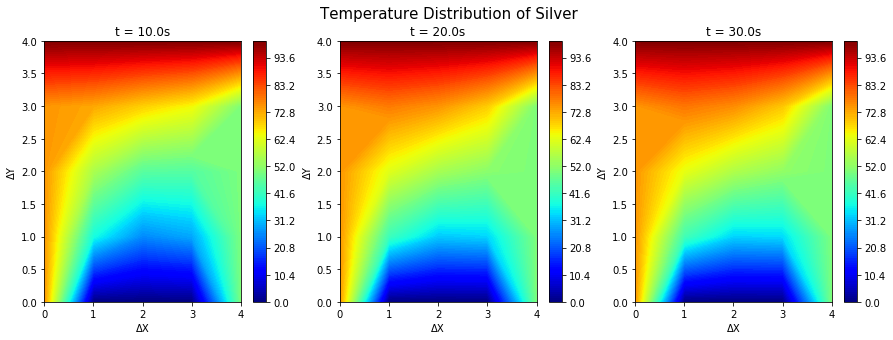

In [93]:
# Made by RODRIGO CARDENAS DOMINGUEZ.
# April 7th, 2018.
# UNIVERSIDAD IBEROAMERICANA, ENGINEERING PHYSICS.

# FINITE DIFFERENCE: PARABOLIC EQUATIONS IN TWO SPATIAL DIMENSIONS.
# HEAT CONDUCTION EQUATION.
# ALTERNATING-DIRECTION IMPLICIT METHOD.


import matplotlib.pyplot as plt
import numpy as np
import math as mt

M = ['Tin', 'Aluminium', 'Copper', 'Silver']
a = np.array([0.4, 0.835, 1.11, 1.6563])        # coefficient of thermal diffusity [cm^2/s]
p = np.array([7.27, 2.7, 8.96, 10.49])          # density [g/cm^3]
C = np.array([0.05, 0.2174, 0.0923, 0.056])     # heat capacity [cal/(g·ºC)]
k = np.zeros(4)                                 # coefficient of thermal conductivity [cal/(s·cm·ºC)]

dt = 10 # s
dx = 10 # cm

X = np.arange(5)
Y = np.arange(5)



for n in range(0, 4):
    
    plt.figure(figsize=(15, 4.8))
    plt.suptitle('Temperature Distribution of ' + M[n], fontsize=15 )
    
    t = 0.0
    
    B = a[n]*(dt/(dx*dx))
    k[n] = a[n]*p[n]*C[n]
    
    A = np.array([[75.0, 0.0, 0.0, 0.0, 50.0], 
                  [75.0, 0.0, 0.0, 0.0, 50.0], 
                  [75.0, 0.0, 0.0, 0.0, 50.0], 
                  [75.0, 0.0, 0.0, 0.0, 50.0], 
                  [100.0, 100.0, 100.0, 100.0, 100.0]])

    U = np.array([[2*(1+B),      -B,        0.0], 
                  [-B,      2*(1+B),         -B], 
                  [0.0,          -B,   2*(1+B)]]) 

    while( t < 30):
    
        i = 1
        for j in range(1, 4):
            L = np.array([B*(A[i, j-1] + A[i, j+1] + A[i-1, j]) + 2*(1-B)*A[i, j], 
                          B*(A[i+1, j-1] + A[i+1, j+1]) + 2*(1-B)*A[i+1, j],
                          B*(A[i+2, j-1] + A[i+2, j+1] + A[i+3, j]) + 2*(1-B)*A[i+2, j]])    
            T = np.linalg.solve(U, L)
            A[1:4, j] = T

        j = 1
        for i in range(1, 4):
            L = np.array([B*(A[i-1, j] + A[i+1, j] + A[i, j-1]) + 2*(1-B)*A[i, j], 
                          B*(A[i-1, j+1] + A[i+1, j+1]) + 2*(1-B)*A[i, j+1],
                          B*(A[i-1, j+2] + A[i+1, j+2] + A[i, j+3]) + 2*(1-B)*A[i, j+2]])    
            T = np.linalg.solve(U, L)
            A[i, 1:4] = T
            
        t = t + 1
    
        if(t%10==0 and t!=0):
            plt.subplot(1,3,t/10)   
            plt.contourf(X,Y,A,150)
            plt.xlabel('ΔX')
            plt.ylabel('ΔY')
            plt.title('t = '+ str(t) +'s')
            plt.set_cmap('jet')
            plt.colorbar()
    
plt.show()